In [137]:
import json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [138]:
# without transmission cut
data = []
with open('../results/2023-06-17_05-13-31_results.json') as f:
    data.extend(json.load(f))
with open('../results/2023-06-17_05-52-33_results.json') as f:
    data.extend(json.load(f))
with open('../results/2023-06-17_10-22-31_results.json') as f:
    data.extend(json.load(f))
    
# with transmission cut
# with open('../results/2023-06-16_22-09-00_results.json') as f:
#    data = json.load(f)

In [139]:
for d in data:
    results = d['results']
    configs = d['configs']
    
    r2 = results['total']['r2score_val']
    r2_train = results['total']['r2score_train']
    print(configs)
    print('train', '{0:.4}'.format(np.mean(r2_train)) + '\\pm {0:.3}'.format(np.std(r2_train)))
    print('val', '{0:.4}'.format(np.mean(r2)) + '\\pm {0:.3}'.format(np.std(r2)))

{'depth': 4, 'optimizer': 'ADAM', 'n_folds': 5, 'dropout_rate': 0.0, 'loss_function': 'mse', 'learning_rate': 0.001, 'n_epochs': 2500, 'width': 50, 'activation_function': 'sigmoid', 'batchsize': 1024}
train 0.9887\pm 0.000291
val 0.9884\pm 0.000311
{'depth': 4, 'optimizer': 'ADAM', 'n_folds': 5, 'dropout_rate': 0.0, 'loss_function': 'mse', 'learning_rate': 0.001, 'n_epochs': 2500, 'width': 75, 'activation_function': 'sigmoid', 'batchsize': 1024}
train 0.9907\pm 0.000169
val 0.99\pm 0.000169
{'depth': 4, 'optimizer': 'ADAM', 'n_folds': 5, 'dropout_rate': 0.0, 'loss_function': 'mse', 'learning_rate': 0.001, 'n_epochs': 2500, 'width': 100, 'activation_function': 'sigmoid', 'batchsize': 1024}
train 0.9918\pm 8.55e-05
val 0.9905\pm 7.63e-05
{'depth': 5, 'optimizer': 'ADAM', 'n_folds': 5, 'dropout_rate': 0.0, 'loss_function': 'mse', 'learning_rate': 0.001, 'n_epochs': 2500, 'width': 50, 'activation_function': 'sigmoid', 'batchsize': 1024}
train 0.9891\pm 0.000282
val 0.9887\pm 0.000217
{'dep

In [140]:
for d in data:
    print(d['model_id'])
    print(d['configs'])
    for i in range(1, 7):
        val_mapes = d['results']['by_response'][f'OBJ{i}']['mape_val']
        print(f'OBJ{i}', np.mean(val_mapes))

2023-06-17_01-16-18_w=50_d=4_activation=sigmoid_bs=1024_lr=0.001_dr=0.0
{'depth': 4, 'optimizer': 'ADAM', 'n_folds': 5, 'dropout_rate': 0.0, 'loss_function': 'mse', 'learning_rate': 0.001, 'n_epochs': 2500, 'width': 50, 'activation_function': 'sigmoid', 'batchsize': 1024}
OBJ1 0.0196833996
OBJ2 0.018084489
OBJ3 0.0150059135
OBJ4 0.0899234852
OBJ5 0.06242489720000001
OBJ6 0.061937866200000004
2023-06-17_03-50-53_w=75_d=4_activation=sigmoid_bs=1024_lr=0.001_dr=0.0
{'depth': 4, 'optimizer': 'ADAM', 'n_folds': 5, 'dropout_rate': 0.0, 'loss_function': 'mse', 'learning_rate': 0.001, 'n_epochs': 2500, 'width': 75, 'activation_function': 'sigmoid', 'batchsize': 1024}
OBJ1 0.0164822
OBJ2 0.018155267200000002
OBJ3 0.0136874781
OBJ4 0.0775406592
OBJ5 0.0535271296
OBJ6 0.053378477800000004
2023-06-17_01-16-18_w=100_d=4_activation=sigmoid_bs=1024_lr=0.001_dr=0.0
{'depth': 4, 'optimizer': 'ADAM', 'n_folds': 5, 'dropout_rate': 0.0, 'loss_function': 'mse', 'learning_rate': 0.001, 'n_epochs': 2500, 'wi

In [141]:
def getinfo(obj):
    infotoformat = {4: {}, 5: {}, 6: {}}
    for d in data:
        results = d['results']
        configs = d['configs']

        r2 = results['by_response'][obj]['mape_val']

        infotoformat[
            configs['depth']
        ][configs['width']] = '${0:.4}'.format(np.mean(r2)) + '\\pm {0:.3}$'.format(np.std(r2))
    
    return infotoformat

In [142]:
def formatinfo(vals, obj):
    print(f"% {obj}")
    print("\hline")
    print("\multirow{4}{*}{\\texttt{%s}} & & Depth 4 & Depth 5 & Depth 6 \\\\ \cline{2-5}" % obj)
    print('''
& Width 50 & %s & %s & %s \\\\
& Width 75 & %s & %s & %s \\\\
& Width 100 & %s & %s & %s \\\\
    ''' % tuple(vals[depth][width] for depth in [4, 5, 6] for width in [50, 75, 100]))
    print(
        """\hline
\multicolumn{5}{c}{} \\\\
        """
    )

In [143]:
def maketable(obj):
    vals = getinfo(obj)
    formatinfo(vals, obj)

In [144]:
for i in [1, 2, 3, 4, 5, 6]:
    maketable(f'OBJ{i}')

% OBJ1
\hline
\multirow{4}{*}{\texttt{OBJ1}} & & Depth 4 & Depth 5 & Depth 6 \\ \cline{2-5}

& Width 50 & $0.01968\pm 0.0006$ & $0.01648\pm 0.000375$ & $0.01501\pm 0.000192$ \\
& Width 75 & $0.01994\pm 0.00101$ & $0.01623\pm 0.000253$ & $0.01473\pm 0.000238$ \\
& Width 100 & $0.01924\pm 0.000953$ & $0.01591\pm 0.000533$ & $0.0148\pm 0.000189$ \\
    
\hline
\multicolumn{5}{c}{} \\
        
% OBJ2
\hline
\multirow{4}{*}{\texttt{OBJ2}} & & Depth 4 & Depth 5 & Depth 6 \\ \cline{2-5}

& Width 50 & $0.01808\pm 3.98e-05$ & $0.01816\pm 0.000112$ & $0.01815\pm 0.000124$ \\
& Width 75 & $0.01809\pm 5.69e-05$ & $0.01805\pm 4.09e-05$ & $0.01815\pm 7.62e-05$ \\
& Width 100 & $0.01806\pm 4.37e-05$ & $0.01804\pm 3.7e-05$ & $0.01818\pm 3.42e-05$ \\
    
\hline
\multicolumn{5}{c}{} \\
        
% OBJ3
\hline
\multirow{4}{*}{\texttt{OBJ3}} & & Depth 4 & Depth 5 & Depth 6 \\ \cline{2-5}

& Width 50 & $0.01501\pm 0.000276$ & $0.01369\pm 0.000502$ & $0.01303\pm 0.000279$ \\
& Width 75 & $0.01491\pm 0.0004$

In [145]:
def compute_color(depth, width, alpha=1.):
    orange = (0.8, 0.3, 0.1)
    green = (0.4, 0.8, 0.4)
    blue = (0.1, 0.2, 0.8)
    #purple = (0.4, 0.1, 0.3)
    main = orange
    if width == 50:
        main = orange
    if width == 75:
        main = green
    if width == 100:
        main = blue
    return (*main, alpha*(.32*(depth-6)+0.85))

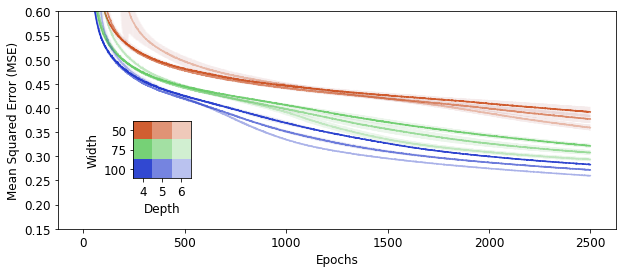

In [152]:
# plotting training histories
def get_training_losses(results):
    output = {}
    for result in results:
        depth = result['configs']['depth']; width = result['configs']['width']
        losses = result['results']['total']['training_losses']
        output[f'{depth}_{width}'] = losses
    return output

def get_color(depth, width, depths=[4, 5, 6], widths=[50, 75, 100], alpha_adjust=.3, err=False):
    orange = (0.8, 0.3, 0.1)
    green = (0.4, 0.8, 0.4)
    blue = (0.1, 0.2, 0.8)
    
    colors = [orange, green, blue]
    
    if depth not in depths or width not in widths:
        raise(NotImplementedError)
    else:
        didx = depths.index(depth); widx = widths.index(width)
        color = colors[widx]
        alpha = (0.9 - alpha_adjust*didx)*(0.1 if err else 1.)
    return (*color, alpha)

depths = [4, 5, 6]; widths = [50, 75, 100];

fig, ax = plt.subplots(1, 1, figsize=(10,4))

all_training_losses = get_training_losses(data)
epochs = np.arange(1, 2501)

for depth in depths:
    for width in widths:
        training_losses = all_training_losses[f'{depth}_{width}']
        ax.plot(np.mean(training_losses, axis=0), color=get_color(depth, width))
        ax.errorbar(
            epochs, np.mean(training_losses, axis=0),
            yerr=np.std(training_losses, axis=0), color=get_color(depth, width, err=True), alpha=0.01)

ax.set_ylim([0.15, 0.6])
ax.set_xlabel('Epochs')
ax.set_ylabel('Mean Squared Error (MSE)')
        
l, b, h, w = .17, .3, .2, .2
ax2 = fig.add_axes([l, b, w, h])
ax2.imshow(
    np.array([[get_color(depth, width) for depth in depths] for width in widths])
)
ax2.set_xlabel('Depth')
ax2.set_ylabel('Width')
ax2.set_xticks([0., 1., 2.])
ax2.set_yticks([0., 1., 2.])
ax2.set_xticklabels(depths)
ax2.set_yticklabels(widths)

plt.savefig("../img/notransmissioncut_traininglosses.png", dpi=500)
plt.show()

In [147]:
frontiers_mapes = {
    'OBJ1': 0.024,
    'OBJ2': 0.019,
    'OBJ3': 0.020,
    'OBJ4': 0.082,
    'OBJ5': 0.128,
    'OBJ6': 0.125,
}

In [148]:
data[0]['model_id']

'2023-06-17_01-16-18_w=50_d=4_activation=sigmoid_bs=1024_lr=0.001_dr=0.0'

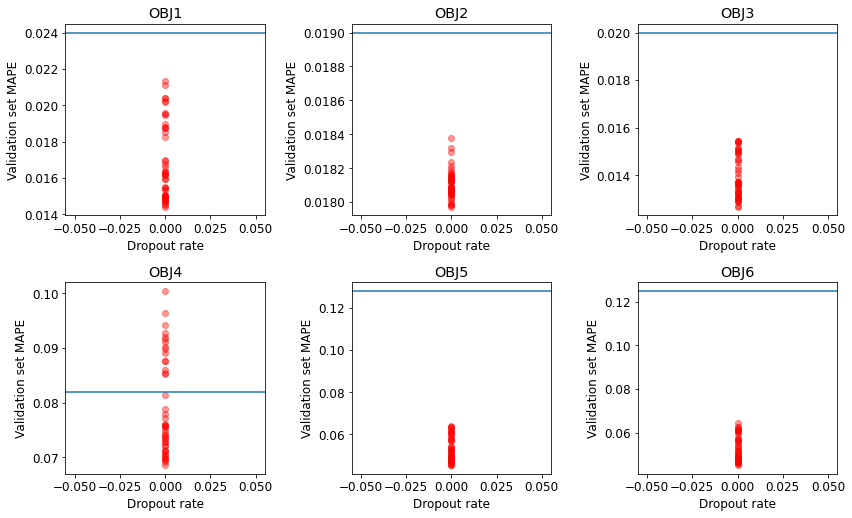

In [149]:
# mapes
fig, axs = plt.subplots(2, 3, figsize=(12, 8))

for i in range(1, 7):
    ax = axs.flatten()[i-1]
    ax.axhline(frontiers_mapes[f'OBJ{i}'], label='MAPE from Frontiers')
    ax.set_title(f'OBJ{i}')
    ax.set_xlabel('Dropout rate')
    ax.set_ylabel('Validation set MAPE')
#    ax.set_ylim(paper_mapes[f'OBJ{i}']*.8, paper_mapes[f'OBJ{i}']*1.25)

for d in data:
    configs = d['configs']
    results = d['results']
    dropout_rate = configs['dropout_rate']
    if dropout_rate > 0.75:
        continue
    else:
        for i in range(1, 7):
            ax = axs.flatten()[i-1]

            obj_results = results['by_response'][f'OBJ{i}']
            mape_val = obj_results['mape_val']

            ax.scatter([dropout_rate]*5, mape_val, color='r', alpha=0.4)
   
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
# fig.suptitle('w=200_d=6_activation=sigmoid_bs=1024_lr=0.001')
plt.show()

In [17]:
for d in data:
    configs = d['configs']
    results = d['results']
    dropout_rate = configs['dropout_rate']
    for i in range(1, 7):
        if i >= 5:
            obj_results = results['by_response'][f'OBJ{i}']
            mape_val = obj_results['mape_val']
            print(f'OBJ {i}')
            print(mape_val)

OBJ 5
[0.053371146, 0.05535614, 0.0559372, 0.055606287, 0.05196872]
OBJ 6
[0.05362743, 0.055319734, 0.05561436, 0.055588324, 0.05174087]
OBJ 5
[0.049133103, 0.04708674, 0.053549524, 0.04781544, 0.047164395]
OBJ 6
[0.047921684, 0.04676654, 0.050873872, 0.048150536, 0.04720723]
OBJ 5
[0.043044187, 0.04413796, 0.042864922, 0.043974087, 0.04430586]
OBJ 6
[0.043100115, 0.04341785, 0.042789042, 0.043139286, 0.04303329]
OBJ 5
[0.05329579, 0.05338721, 0.054892417, 0.060537778, 0.054271165]
OBJ 6
[0.053203396, 0.054510087, 0.053742517, 0.056585506, 0.05187754]
OBJ 5
[0.044965055, 0.050127935, 0.045178566, 0.045018364, 0.049910493]
OBJ 6
[0.04486687, 0.047145166, 0.045741133, 0.04514944, 0.046882827]
OBJ 5
[0.04262615, 0.042314935, 0.041026462, 0.04336154, 0.042481415]
OBJ 6
[0.042525165, 0.042199526, 0.041253664, 0.042371407, 0.04451726]
OBJ 5
[0.05132354, 0.05390656, 0.050293364, 0.051879622, 0.051432908]
OBJ 6
[0.0505807, 0.052922383, 0.05003714, 0.052106835, 0.052279975]
OBJ 5
[0.043327663, 

In [173]:
for d in data:
    print(d['results']['by_response']['OBJ5']['mape_val'])

[0.12617181, 0.12886064, 0.12890603, 0.12773697, 0.12662774]
[0.12224516, 0.120170705, 0.12102177, 0.12165374, 0.119857214]
[0.12530094, 0.12066077, 0.11682191, 0.11959501, 0.12408902]
[0.12568495, 0.1241727, 0.12781265, 0.12380472, 0.122926615]
[0.13299948, 0.124080636, 0.1290278, 0.3460866, 0.13005708]
[0.34025598, 0.13648492, 0.135988, 0.34902093, 0.3403678]


No handles with labels found to put in legend.


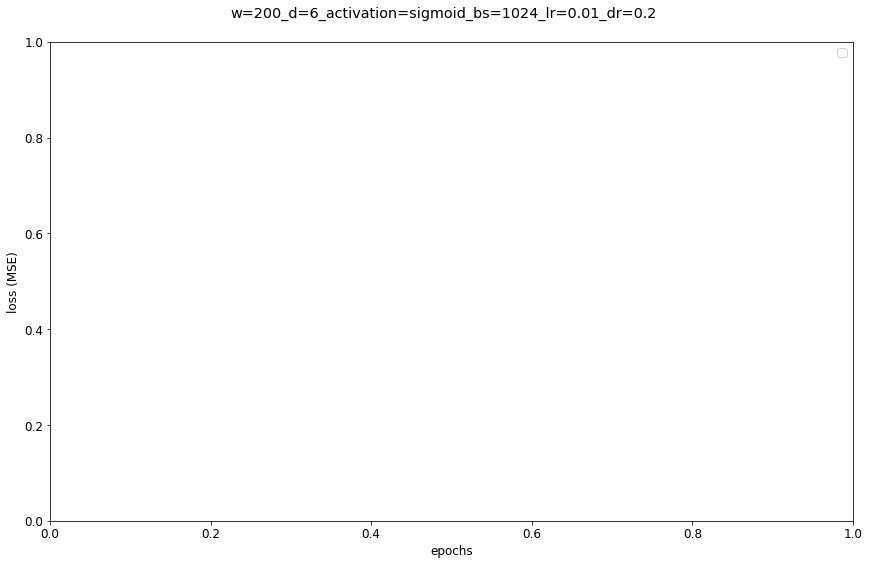

In [18]:
# mapes
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

for d in data:
    configs = d['configs']
    results = d['results']
    dropout_rate = configs['dropout_rate']
    if dropout_rate == 0.5:
        training_losses = results['total']['training_losses']

        for fold_id in range(5):
            ax.plot(np.arange(1, 2501), training_losses[fold_id], alpha=0.5, label=fold_id)

plt.legend()
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.suptitle('w=200_d=6_activation=sigmoid_bs=1024_lr=0.01_dr=0.2')
ax.set_xlabel('epochs')
ax.set_ylabel('loss (MSE)')
#ax.set_ylim(11.6, 12.)
plt.show()